# Network Vulnerability test
Dataset used: CSIC 2010 Web Application Attacks.

Download from:
https://www.kaggle.com/datasets/ispangler/csic-2010-web-application-attacks?select=csic_database.csv

In [ ]:
import pandas as pd
import numpy as np

## Load Dataset and Perform EDA

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/csic_database.csv")

In [ ]:
df.head()

,Unnamed: 0,Method,User-Agent,Pragma,Cache-Control,Accept,Accept-encoding,Accept-charset,language,host,cookie,content-type,connection,lenght,content,classification,URL
0,Normal,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=1F767F17239C9B670A39E9B10C3825F4,NaN,close,NaN,NaN,0,http://localhost:8080/tienda1/index.jsp HTTP/1.1
1,Normal,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=81761ACA043B0E6014CA42A4BCD06AB5,NaN,close,NaN,NaN,0,http://localhost:8080/tienda1/publico/anadir.j...
2,Normal,POST,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=933185092E0B668B90676E0A2B0767AF,application/x-www-form-urlencoded,Connection: close,Content-Length: 68,id=3&nombre=Vino+Rioja&precio=100&cantidad=55&...,0,http://localhost:8080/tienda1/publico/anadir.j...
3,Normal,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=8FA18BA82C5336D03D3A8AFA3E68CBB0,NaN,close,NaN,NaN,0,http://localhost:8080/tienda1/publico/autentic...
4,Normal,POST,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=7104E6C68A6BCF1423DAE990CE49FEE2,application/x-www-form-urlencoded,Connection: close,Content-Length: 63,modo=entrar&login=choong&pwd=d1se3ci%F3n&remem...,0,http://localhost:8080/tienda1/publico/autentic...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61065 entries, 0 to 61064
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       61065 non-null  object
 1   Method           61065 non-null  object
 2   User-Agent       61065 non-null  object
 3   Pragma           61065 non-null  object
 4   Cache-Control    61065 non-null  object
 5   Accept           60668 non-null  object
 6   Accept-encoding  61065 non-null  object
 7   Accept-charset   61065 non-null  object
 8   language         61065 non-null  object
 9   host             61065 non-null  object
 10  cookie           61065 non-null  object
 11  content-type     17977 non-null  object
 12  connection       61065 non-null  object
 13  lenght           17977 non-null  object
 14  content          17977 non-null  object
 15  classification   61065 non-null  int64 
 16  URL              61065 non-null  object
dtypes: int64(1), object(16)
memory 

In [ ]:
df.describe()

,classification
count,61065.000000
mean,0.410464
std,0.491922
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
df.rename(columns = {'Unnamed: 0':'Attack'}, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61065 entries, 0 to 61064
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Attack           61065 non-null  object
 1   Method           61065 non-null  object
 2   User-Agent       61065 non-null  object
 3   Pragma           61065 non-null  object
 4   Cache-Control    61065 non-null  object
 5   Accept           60668 non-null  object
 6   Accept-encoding  61065 non-null  object
 7   Accept-charset   61065 non-null  object
 8   language         61065 non-null  object
 9   host             61065 non-null  object
 10  cookie           61065 non-null  object
 11  content-type     17977 non-null  object
 12  connection       61065 non-null  object
 13  lenght           17977 non-null  object
 14  content          17977 non-null  object
 15  classification   61065 non-null  int64 
 16  URL              61065 non-null  object
dtypes: int64(1), object(16)
memory 

In [ ]:
len(df[(df["Attack"]!="Normal") & (df["classification"]==1)])

25065

In [ ]:
df.drop(['Attack'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61065 entries, 0 to 61064
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Method           61065 non-null  object
 1   User-Agent       61065 non-null  object
 2   Pragma           61065 non-null  object
 3   Cache-Control    61065 non-null  object
 4   Accept           60668 non-null  object
 5   Accept-encoding  61065 non-null  object
 6   Accept-charset   61065 non-null  object
 7   language         61065 non-null  object
 8   host             61065 non-null  object
 9   cookie           61065 non-null  object
 10  content-type     17977 non-null  object
 11  connection       61065 non-null  object
 12  lenght           17977 non-null  object
 13  content          17977 non-null  object
 14  classification   61065 non-null  int64 
 15  URL              61065 non-null  object
dtypes: int64(1), object(15)
memory usage: 7.5+ MB


## Define and Train the Model

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.utils import to_categorical
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
df = df.apply(LabelEncoder().fit_transform)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61065 entries, 0 to 61064
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Method           61065 non-null  int64
 1   User-Agent       61065 non-null  int64
 2   Pragma           61065 non-null  int64
 3   Cache-Control    61065 non-null  int64
 4   Accept           61065 non-null  int64
 5   Accept-encoding  61065 non-null  int64
 6   Accept-charset   61065 non-null  int64
 7   language         61065 non-null  int64
 8   host             61065 non-null  int64
 9   cookie           61065 non-null  int64
 10  content-type     61065 non-null  int64
 11  connection       61065 non-null  int64
 12  lenght           61065 non-null  int64
 13  content          61065 non-null  int64
 14  classification   61065 non-null  int64
 15  URL              61065 non-null  int64
dtypes: int64(16)
memory usage: 7.5 MB


In [ ]:
## Assuming the dependent feature is in the column named 'target'
X = df.drop('classification', axis=1).values  # Independent features
y = df['classification'].values  # Dependent feature

# Standardize the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert the labels to binary categorical (0 or 1)
y = to_categorical(y, num_classes=2)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input data for LSTM (assuming you have 15 features)
X_train_lstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Create an LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=150, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(units=15, activation='relu'))

# Reshape the data for 1D CNN
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Create a 1D CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())

# Combine the LSTM and CNN models
combined_model = Sequential()
combined_model.add(Sequential([lstm_model, cnn_model]))

# Add dense layers for classification
combined_model.add(Dense(units=64, activation='relu'))
combined_model.add(Dense(units=2, activation='softmax'))  # Binary classification

# Compile the combined model
combined_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
print(X_train.shape,X_test.shape,y.shape)

(48852, 15) (12213, 15) (61065, 2)


In [ ]:
combined_model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 192)               101993    
                                                                 
 dense_1 (Dense)             (None, 64)                12352     
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 114475 (447.17 KB)
Trainable params: 114475 (447.17 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
1527/1527 [==============================] - 15s 8ms/step - loss: 0.6432 - accuracy: 0.6259 - val_loss: 0.6271 - val_accuracy: 0.6339
Epoch 2/10
1527/1527 [==============================] - 10s 6ms/step - loss: 0.6186 - accuracy: 0.6460 - val_loss: 0.6037 - val_accuracy: 0.6678
Epoch 3/10
1527/1527 [==============================] - 11s 7ms/step - loss: 0.5988 - accuracy: 0.6663 - val_loss: 0.5822 - val_accuracy: 0.6737
Epoch 4/10
1527/1527 [==============================] - 12s 8ms/step - loss: 0.5729 - accuracy: 0.6822 - val_loss: 0.5553 - val_accuracy: 0.7217
Epoch 5/10
1527/1527 [==============================] - 12s 8ms/step - loss: 0.5398 - accuracy: 0.7045 - val_loss: 0.5356 - val_accuracy: 0.7166
Epoch 6/10
1527/1527 [==============================] - 10s 6ms/step - loss: 0.5226 - accuracy: 0.7147 - val_loss: 0.5410 - val_accuracy: 0.6918
Epoch 7/10
1527/1527 [==============================] - 12s 8ms/step - loss: 0.5131 - accuracy: 0.7178 - val_loss: 0.5085 - val_ac

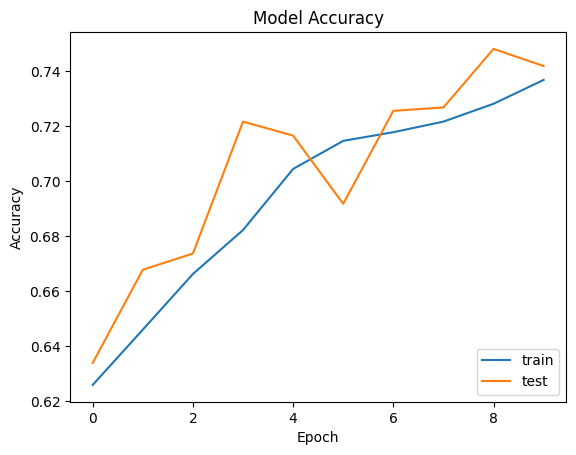

In [ ]:
# Train the combined model
trace = combined_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test))
# Make predictions on the test set
#y_pred = model.predict_classes(X_test)

# Convert one-hot encoded labels back to original labels
#y_test_labels = np.argmax(y_test, axis=1)

# Evaluate the classifier
#accuracy = accuracy_score(y_test_labels, y_pred)
#print(f'Accuracy: {accuracy:.2f}')

# Display classification report
#print('Classification Report:')
#print(classification_report(y_test_labels, y_pred))
import matplotlib.pyplot as plt
plt.plot(trace.history['accuracy'])
plt.plot(trace.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='lower right')
plt.show()

In [ ]:
trace.history

{'loss': [0.6431728601455688,
  0.6186210513114929,
  0.5988362431526184,
  0.5729081630706787,
  0.5397619009017944,
  0.5225633382797241,
  0.5130943059921265,
  0.5032923817634583,
  0.4953398108482361,
  0.4897362291812897],
 'accuracy': [0.6259109377861023,
  0.6460124254226685,
  0.6662572622299194,
  0.6822443008422852,
  0.7044747471809387,
  0.7146892547607422,
  0.717841625213623,
  0.7216899991035461,
  0.7281789779663086,
  0.7368582487106323],
 'val_loss': [0.6270885467529297,
  0.603679358959198,
  0.5821630358695984,
  0.5552763938903809,
  0.5355576276779175,
  0.5410354137420654,
  0.5084647536277771,
  0.49053773283958435,
  0.4808092713356018,
  0.47978344559669495],
 'val_accuracy': [0.6339147090911865,
  0.6678130030632019,
  0.6737083196640015,
  0.7216899991035461,
  0.7166134715080261,
  0.6918038129806519,
  0.7256202697753906,
  0.7268484234809875,
  0.7481372356414795,
  0.7419143319129944]}